In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import numpy as np

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [128]:
def Retired_Working(Country: str):

    array = []

    df_final = pd.DataFrame(columns=['Index', 'Retired', 'Working'])

    for file in os.listdir(f"../../data/processed/{Country}/"):
        
        tmp_df = pd.read_csv(f'../../data/processed/{Country}/' + file, index_col=0)
        year = file.split('-')[1].split('.')[0]
            
        retired = 0
        working = 0
        
        for index, cuerpo in tmp_df.iterrows():
        
            if tmp_df.iloc[index]['Gender'] == 'Male':
                tmp_df.iloc[index] = tmp_df.iloc[index]['Age'], \
                    tmp_df.iloc[index]['Count'] * -1, \
                        tmp_df.iloc[index]['Gender']
            else:
                pass

        for index, cuerpo in tmp_df.iterrows():
            if tmp_df.iloc[index]['Age'] == '100+':
                retired += tmp_df.iloc[index]['Count']
                
            elif int(tmp_df.iloc[index]['Age']) > 64:
                retired += tmp_df.iloc[index]['Count']
                
            elif int(tmp_df.iloc[index]['Age']) <= 64 and int(tmp_df.iloc[index]['Age']) >= 18:
                working += tmp_df.iloc[index]['Count']
                
        df_final = df_final.append({'Index': year, 'Retired': retired, 'Working': working}, ignore_index=True)
        
    df_final = df_final.set_index('Index')
    df_final.sort_index(inplace=True)
    
    return df_final

In [134]:
df_final = Retired_Working('Spain')

<AxesSubplot:title={'center':'Working vs Retired Ratio'}, xlabel='Index'>

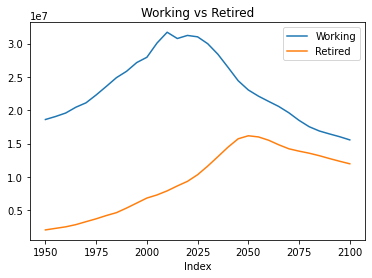

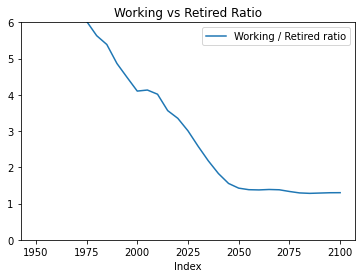

In [135]:
df_final["Working / Retired ratio"] = df_final["Working"]/df_final["Retired"]

df_final.plot(y=["Working", "Retired"], layout=(2,1), title="Working vs Retired")

df_final.plot(y=["Working / Retired ratio"], layout=(2,1), title="Working vs Retired Ratio", ylim=(0, 6))